## Accessing OpenFOAM (Version 6 or Version 7)

In [5]:
app = ag.apps.get(appId="openfoam-7.0u4")
app

{'id': 'openfoam-7.0u4',
 'name': 'openfoam',
 'icon': None,
 'uuid': '3580658568626302485-242ac118-0001-005',
 'parallelism': 'PARALLEL',
 'defaultProcessorsPerNode': 64,
 'defaultMemoryPerNode': 1,
 'defaultNodeCount': 1,
 'defaultMaxRunTime': '48:00:00',
 'defaultQueue': 'normal',
 'version': '7.0',
 'revision': 4,
 'isPublic': True,
 'helpURI': 'https://www.designsafe-ci.org/rw/user-guides/tools-applications/simulation/openfoam/',
 'label': 'OpenFOAM (V7)',
 'owner': 'ds_apps',
 'shortDescription': 'OpenFOAM is free, open source software for computational fluid dynamics (CFD).',
 'longDescription': 'OpenFOAM is free, open source software for computational fluid dynamics (CFD).',
 'tags': ['designsafe', 'appCategory:Simulation', 'appIcon:OpenFOAM'],
 'ontology': [],
 'executionType': 'HPC',
 'executionSystem': 'designsafe.community.exec.stampede2.nores',
 'deploymentPath': '/applications/openfoam-7.0u4.zip',
 'deploymentSystem': 'designsafe.storage.default',
 'templatePath': 'wrappe

## Illustrative case
### Simulation of the wind flow around a square cross-section of the building using RANS model
>Case directory: DH1_run contains $0$, *constant* and *system* directories.

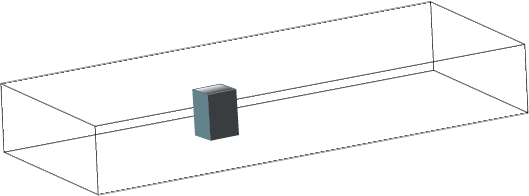

## Mesh generation using the *blockMesh* utility 
> Note: The grid resolution in the plot doesn't meet the requirement for running RANS simulations. This is only for an illustrative case.

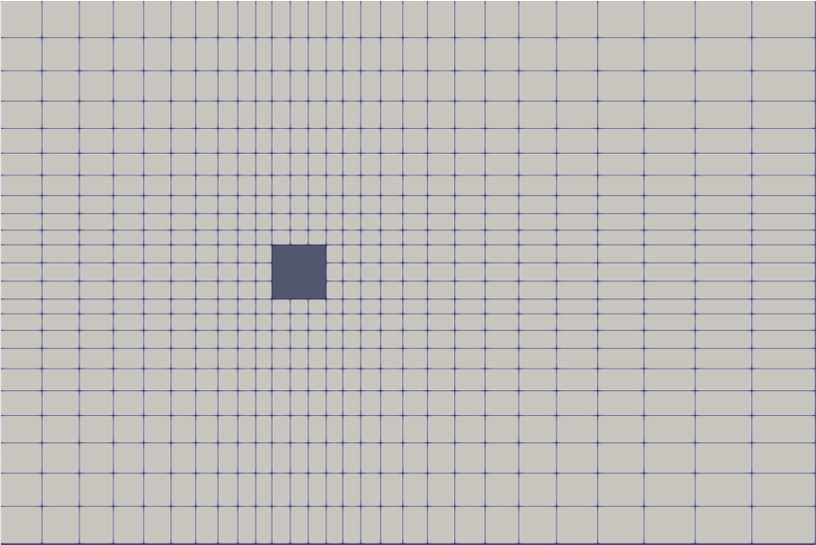

In [6]:
f = open("DH1_run/system/blockMeshDict", "r")
file_contents = f.read()
print(file_contents)

/*--------------------------------*- C++ -*----------------------------------*\
| =========                 |                                                 |
| \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox           |
|  \\    /   O peration     | Version:  2.3.1                                 |
|   \\  /    A nd           | Web:      www.OpenFOAM.org                      |
|    \\/     M anipulation  |                                                 |
\*---------------------------------------------------------------------------*/
FoamFile
{
    version     2.0;
    format      ascii;
    class       dictionary;
    object      blockMeshDict;
}
// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //
// Parametrized building geometry

//m4 definitions:







// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //
//Building length x and width y





/*--------------------------------*- C++ -*------------------------

In [7]:
f = open("DH1_run/0/U", "r")
file_contents = f.read()
print(file_contents)

/*--------------------------------*- C++ -*----------------------------------*\
| =========                 |                                                 |
| \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox           |
|  \\    /   O peration     | Version:  2.3.1                                 |
|   \\  /    A nd           | Web:      www.OpenFOAM.org                      |
|    \\/     M anipulation  |                                                 |
\*---------------------------------------------------------------------------*/
FoamFile
{
    version     2.0;
    format      ascii;
    class       volVectorField;
    object      U;
}
// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //

dimensions      [0 1 -1 0 0 0 0];

internalField   uniform (0 0 0);

boundaryField
{

    inlet         
    {
        type            fixedValue;
        value           uniform (1 0 0);
    }

    outlet
    {
    	type            inletOutlet;
    	

In [8]:
f = open("DH1_run/constant/turbulenceProperties", "r")
file_contents = f.read()
print(file_contents)

/*--------------------------------*- C++ -*----------------------------------*\
| =========                 |                                                 |
| \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox           |
|  \\    /   O peration     | Version:  2.3.1                                 |
|   \\  /    A nd           | Web:      www.OpenFOAM.org                      |
|    \\/     M anipulation  |                                                 |
\*---------------------------------------------------------------------------*/
FoamFile
{
    version     2.0;
    format      ascii;
    class       dictionary;
    location    "constant";
    object      turbulenceProperties;
}
// * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * //

simulationType  RAS;

RAS
{
	RASModel            kOmegaSST;

	turbulence          on;

	printCoeffs         on;
}

// ************************************************************************* //



## Setup the OpenFOAM run configuration
(Reference:
Harish, Ajay Bangalore; Govindjee, Sanjay; McKenna, Frank (2020) “CFD Notebooks (Beginner).” DesignSafe-CI. https://doi.org/10.17603/ds2-w2x6-nm09.)

> Specify the number of nodes and processors for parallel computing <br>
> Select a solver <br>
> Change to your input directory

In [9]:
jobdetails = {
    "name": "OpenFOAM-Demo",
    "appId": "openfoam-7.0u4",
    "maxRunTime": "00:02:00",
    "nodeCount": 1,
    "processorsPerNode": 2,
    "archive": True,
    "archiveSystem": "designsafe.storage.default",
    "parameters": {"mesh": "On", "decomp": "On", "solver": "pisoFoam"},
    "inputs": {
        "inputDirectory": "agave://designsafe.storage.default/tg831598/PyFoam_Jupyter/DH1_run"
    },
}

## Submit to TACC

In [13]:
job = ag.jobs.submit(body=jobdetails)

## Check the status of the job

In [16]:
from agavepy.async import AgaveAsyncResponse
asrp = AgaveAsyncResponse(ag,job)
asrp.status

SyntaxError: invalid syntax (3964297523.py, line 1)

## Post-processing
### Using *ParaView* to visualize the flow fields
*ParaView* can read *OpenFOAM* files using *.foam*.

>If .foam is not included in the case directory, copy:

>**import shutil**

>**shutil.copy2('DH1_run/foam.foam', '../archive/jobs/dst')**

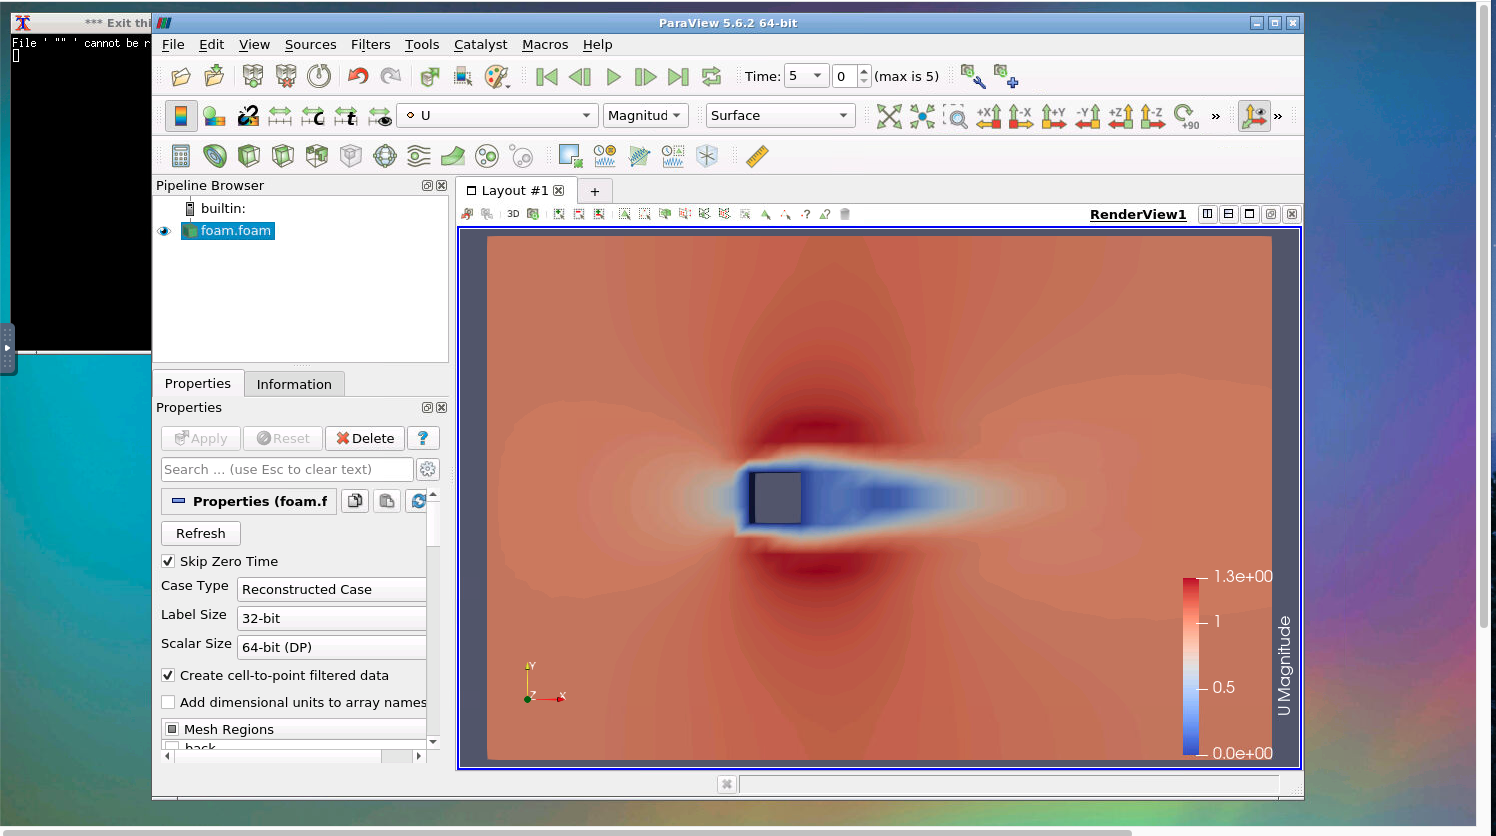

### Plot the time series of the force coefficients
> Input your output directory in **os.chdir()**.

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.chdir(
    "../archive/jobs/job-3571f2bc-6af4-4f57-a946-4d23ca70cd58-007/DH1_run/postProcessing/forceCoeffs/0"
)

FileNotFoundError: [Errno 2] No such file or directory: '../archive/jobs/job-3571f2bc-6af4-4f57-a946-4d23ca70cd58-007/DH1_run/postProcessing/forceCoeffs/0'

In [13]:
def is_float(string):
    """True if given string is float else False"""
    try:
        return float(string)
    except ValueError:
        return False


data = []
with open("forceCoeffs.dat", "r") as f:
    d = f.readlines()
    for i in d:
        k = i.rstrip().split("\t")
        data.append([float(i) if is_float(i) else i for i in k])

data = np.array(data[9:], dtype="O")

FileNotFoundError: [Errno 2] No such file or directory: 'forceCoeffs.dat'

In [14]:
plt.plot(data[100:, 0], data[100:, 2])
plt.xlabel("Time")
plt.ylabel("$C_d$")
plt.show()

TypeError: list indices must be integers or slices, not tuple

In [15]:
plt.plot(data[100:, 0], data[100:, 3])
plt.xlabel("Time")
plt.ylabel("$C_l$")
plt.show()

TypeError: list indices must be integers or slices, not tuple